In [8]:
%matplotlib inline

In [9]:
import numpy as np
import pandas as pd
import xarray as xr

from scipy.interpolate import interp2d
from scipy.io import loadmat


In [10]:
# Read coordinate file
with open('../data/FWF/latlongrid_20km.txt') as f:
    raw_coords = f.readlines()
    
flat = []
for line in raw_coords:
    flat.extend(map(float, line.split()))
    
flat = np.array(flat)

lats, lons = flat[::2].reshape((141, 76)), flat[1::2].reshape((141, 76))

In [11]:
# Read data file
with open('../data/FWF/Greenland_runoff_calving.txt') as f:
    raw = f.readlines()
    
    flat = []
for line in raw:
    flat.extend(map(float, line.split()))
    
flat = np.array(flat)

dims = ('month', 'y', 'x', )
data = flat.reshape(12, 141, 76)
xs = np.arange(76)[::-1]
ys = np.arange(141)


In [12]:
# Put them all together
da = xr.DataArray(data, coords={'month': np.arange(1, 13), 'x': xs, 'y': ys}, dims=dims)

da.coords['lat'] = xr.DataArray(lats, coords={'x': xs, 'y': ys}, dims=('y', 'x', ))
da.coords['lon'] = xr.DataArray(lons, coords={'x': xs, 'y': ys}, dims=('y', 'x', ))

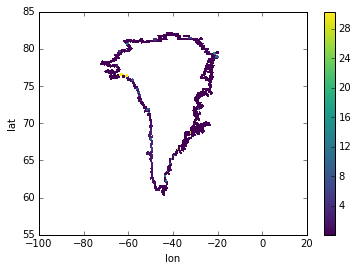

In [13]:
test = da.sum(dim='month')
test.where(test).plot.pcolormesh('lon', 'lat')

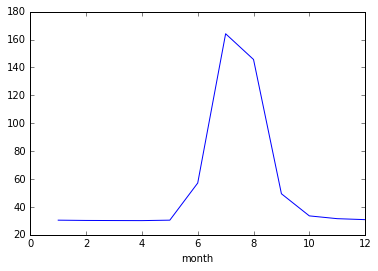

In [14]:
test = da.sum(dim=('x', 'y'))
test.plot()


In [17]:
ds = da.to_dataset(name='fwf')

In [18]:
ds.to_netcdf('../data/processed_bamber_fwf_data.nc')

In [8]:
gl_mask = loadmat('../data/GLMask_only_vic.mat')['ROMask_R']

In [9]:
masks = xr.open_dataset('/Users/jhamman/Dropbox/src/trunk/scripts/rasm_utils/Post_processing/fluxes/RASM_WRFVIC_GRID_MASKS_AND_METRICS.nc')

In [10]:
masks['mask_greenland'] = xr.DataArray(gl_mask, dims=('x', 'y'))

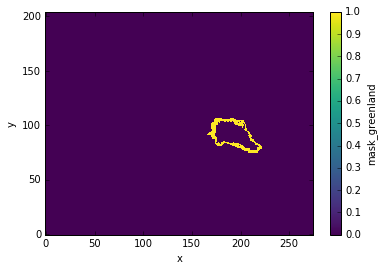

In [11]:
masks['mask_greenland'].plot.pcolormesh('x', 'y')

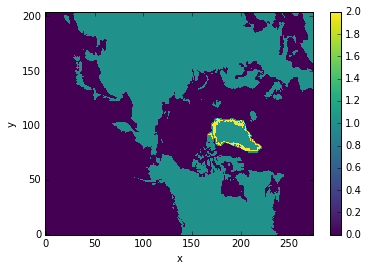

In [12]:
(masks['mask_greenland'] + (1 - masks['mask'])).plot.pcolormesh('x', 'y')

In [13]:
masks

<xarray.Dataset>
Dimensions:             (x: 275, y: 205)
Coordinates:
    latitude            (y, x) float32 16.535 16.7785 17.0222 17.2663 ...
    longitude           (y, x) float32 -170.777 -170.61 -170.442 -170.272 ...
  * y                   (y) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 ...
  * x                   (x) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 ...
Data variables:
    HGT                 (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    cell_area           (y, x) float64 262.5 527.1 530.5 533.8 537.2 540.6 ...
    mask                (y, x) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 ...
    mask_archipelago    (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    mask_atlantic       (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    mask_baffin         (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    mask_baltic         (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    mask_barents        (y, x) float64 0.0 0.0 0.0

In [14]:
ds = xr.open_dataset('/Users/jhamman/workdir/Greenland_5km_dev1.2.nc', decode_cf=False)

In [15]:
ds

<xarray.Dataset>
Dimensions:                (oisotopestimes: 1251, sealeveltimes: 126, time: 1, x1: 301, y1: 561)
Coordinates:
  * sealeveltimes          (sealeveltimes) float32 0.0 1000.0 2000.0 3000.0 ...
  * y1                     (y1) float32 -3.4e+06 -3.395e+06 -3.39e+06 ...
  * oisotopestimes         (oisotopestimes) float32 0.0 100.0 200.0 300.0 ...
  * x1                     (x1) float32 -800000.0 -795000.0 -790000.0 ...
  * time                   (time) float32 0.0
Data variables:
    dhdt                   (time, y1, x1) float32 0.0 0.0 0.0 0.0 0.0 0.0 ...
    surfvelmag             (time, y1, x1) float32 0.0 0.0 0.0 0.0 0.0 0.0 ...
    lat                    (time, y1, x1) float32 58.6293 58.639 58.6487 ...
    balvelmag              (time, y1, x1) float32 0.0 0.0 0.0 0.0 0.0 0.0 ...
    bheatflx               (time, y1, x1) float32 0.0590468 0.0590803 ...
    presprcp               (time, y1, x1) float32 1.02462 1.0241 1.02601 ...
    lon                    (time, y1, x1) f

In [16]:
mask = ds[['landcover', 'lon', 'lat']].squeeze()

In [17]:
mask.rename({'y1': 'y', 'x1': 'x', 'landcover': 'mask', 'lon': 'xc', 'lat': 'yc'}, inplace=True)

<xarray.Dataset>
Dimensions:  (x: 301, y: 561)
Coordinates:
    time     float32 0.0
  * x        (x) float32 -800000.0 -795000.0 -790000.0 -785000.0 -780000.0 ...
  * y        (y) float32 -3.4e+06 -3.395e+06 -3.39e+06 -3.385e+06 -3.38e+06 ...
Data variables:
    mask     (y, x) int32 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
    xc       (y, x) float32 -52.2405 -52.1607 -52.0807 -52.0008 -51.9207 ...
    yc       (y, x) float32 58.6293 58.639 58.6487 58.6584 58.668 58.6775 ...
Attributes:
    Comments: Revised on 15 April 2010 by Glen Granzow at the University of Montana to include bed topography, thickness, and upper surface data from Ute Herzfeld
    Conventions: CF-1.3
    Creators: Jesse Johnson, Brian Hand, Tim Bocek - University of Montana
    History: Original data set created February 2009
    Title: Greenland Developmental Data Set

In [18]:
mask['y'] = np.arange(len(mask['y']))
mask['x'] = np.arange(len(mask['x']))

In [19]:
mask['mask'].values[mask['mask'].values <= 1] = 0

In [20]:
mask['mask'] = mask['mask'].clip(0, 1)

In [21]:
mask['mask'].attrs['long_name'] = "greenland mask"
mask['mask'].attrs['note'] = "unitless"
# mask['mask'].attrs['coordinates'] = "xc yc"
mask['mask'].attrs['comment'] = "0 value indicates cell is not active"


In [22]:
mask.coords['yc'] = mask['yc']
mask.coords['xc'] = mask['xc']

In [23]:
mask = mask.drop('time')

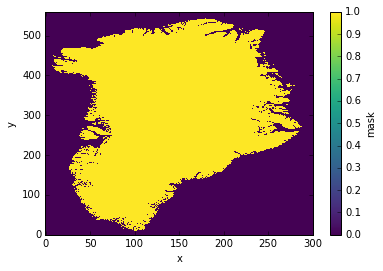

In [24]:
mask.mask.plot()

In [25]:
mask.to_netcdf('/Users/jhamman/workdir/test_gl_mask.nc')

In [26]:
domain = xr.open_dataset('/Users/jhamman/Dropbox/RASM_Joe/domain.lnd.wr50a_ar9v4.100920.nc')

In [31]:
inds = np.nonzero(mask.mask.values.flatten())[0]

In [ ]:
f = interp2d(mask.xc.values.flatten()[inds],
             mask.yc.values.flatten()[inds],
             mask.mask.values.flatten()[inds],
             copy=False, bounds_error=False, fill_value=0)